# การสร้างแผนที่พื้นผิวหรือ surface map จากข้อมูล Metar
METeorological Aerodrome Reports (METARs) เป็นข้อมูลที่รายงานสภาพอากาศ มักใช้ในงานอุตุนิยมวิทยาและงานด้านการบิน https://en.wikipedia.org/wiki/METAR METARs จะรายงานด้วยการเข้ารหัสที่เป็นสากลที่รายงานผลการตรวจวัดของแต่ละสถานี ดังตัวอย่างแผนที่ https://www.aviationweather.gov/metar

* แบบฝึกหัดนี้ประกอบไปด้วยขั้นตอนในการสร้างแผนที่พื้นผิวจากข้อมูล metar 
    * อ่านข้อมูล Metar ตัวอย่าง มาเก็บไว้ใน dataframe ของ pandas แล้วทำความเข้าใจกับตัวแปร 
    * พลอตข้อมูลตัวแปรจาก Metar 
* แหล่งข้อมูล Metar
     * ข้อมูล Metar แบบ text ฟอร์แมทแบบเรียลไทม์เรียกใช้โดยใช้ siphon จากลิงก์ https://thredds-test.unidata.ucar.edu/thredds/catalog/noaaport/text/metar/catalog.html ดูตัวอย่างจากยูทูปลิงก์นี้  https://www.youtube.com/watch?v=M-6rLqk_XA8&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=145
     * ข้อมูล Metar สามารถ subset ได้โดยทำได้หลายฟอร์แมทจากลิงก์นี้ http://thredds.atmos.albany.edu:8080/thredds/ncss/metar/ncdecodedNAm/Metar_NAm_Station_Data_fc.cdmr/dataset.html
     * ข้อมูล Metar กรณีศึกษา ดาวน์โหลดได้จากที่นี่ https://thredds-dev.unidata.ucar.edu/thredds/catalog/catalog.html
    
* คำสั่งพื้นฐานในการใช้ jupyter
    * shift+enter รันคำสั่ง
    * shift+tab อ่านคำอธิบายฟังก์ชัน
    * กด b เพิ่มกล่องคำสั่งทางด้านล่างของกล่องปัจจุบัน
    * กด a เพิ่มกล่องคำสั่งทางด้านบนของกล่องปัจจุบัน
    * กด d d ลบกล่องคำสั่งปัจจุบัน

* โค้ดมาจาก
    * โค้ดมาจากยูทูปของ metpy จากลิงก์ https://www.youtube.com/watch?v=B-ubIg-_6e4&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=105  
และ https://www.youtube.com/watch?v=3sRi4eSg52U&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=106 และ https://www.youtube.com/watch?v=3sRi4eSg52U&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=106
    * โค้ด station plot สามารถนำไปประยุกต์ใช้ได้ https://unidata.github.io/MetPy/latest/examples/plots/Station_Plot.html
    * โค้ดเพิ่มเติม https://unidata.github.io/MetPy/latest/examples/plots/Station_Plot_with_Layout.html

* พื้นฐานที่ควรมีก่อนการใช้งาน Metpy ควรมีทักษะดังนี้ตามลำดับการเรียนรู้ครับ
    * ภาษาไพธอน นิสิตสามารถเรียนรู้ด้วยตนเองจาก อ.ประเสริฐครับ ลิงก์นี้ https://www.youtube.com/watch?v=4MbmbzWAMsg&list=PLoTScYm9O0GH4YQs9t4tf2RIYolHt_YwW&index=13
    * แพคเกจ numpy เอาไว้จัดการข้อมูลอาเรย์หลายมิติ ทางด้านเราก็จะเป็นข้อมูลราสเตอร์ เช่น ข้อมูลภาพดาวเทียมที่มีหลายแบนด์ หรือข้อมูล renalysis หรือข้อมูล forecasting นิสิตสามารถเรียนรู้ด้วยตนเองจาก อ.ประเสริฐครับ ลิงก์นี้ https://www.youtube.com/watch?v=ts2L5mtMMi8&list=PLoTScYm9O0GFNEpzsCBEnkUwgAwOu_PWw
    * แพคเกจ matplotlib  เอาไว้พลอตภาพ https://www.youtube.com/watch?v=WOEOH8OV99k&list=PLoTScYm9O0GGRvUsTmO8MQUkIuM1thTCf
    * แพคเกจ pandas เอาไว้จัดการข้อมูล spread sheet เรียนรู้ด้วยตนเองจาก อ.ประเสริฐ จากลิงก์นี้ครับ https://www.youtube.com/watch?v=W661Zy939Q0&list=PLoTScYm9O0GFVfRk_MmZt0vQXNIi36LUz&index=20
    * แพคเกจ xarray เอาไว้เพื่อจัดการข้อมูลอารเย์หลายมิติ ลองเล่นดูครับ https://docs.xarray.dev/en/stable/gallery.html


* ยูทูปชาแนลและแหล่งเรียนรู้ออนไลน์ที่นิสิตควรศึกษาทางด้านบรรยากาศศาสตร์ ได้แก่
    * Dr.kevin Perry จากมหาวิทยาลัย Utah สอนเรื่องบรรยากาศศาสตร์ https://www.youtube.com/channel/UCktw_bKshmipG9QH_pgMkLw/videos
    * Prof.Dr.Ronald Smith จากมหาวิทยาลัยYale เรื่องThe Atmosphere, the Ocean, and Environmental Change https://oyc.yale.edu/geology-and-geophysics/gg-140
    *หนังสือฟรี อุตุนิยมวิทยาภาคปฏิบัติ สอนการคำนวณของ Prof.Roland Stull https://www.eoas.ubc.ca/books/Practical_Meteorology/

## การดึงข้อมูลและการทำความเข้าใจข้อมูล metar
* โค้ดจากยูทูป metpy ลิงก์นี้ https://www.youtube.com/watch?v=B-ubIg-_6e4&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=105
* ใช้ข้อมูลจากนี้ https://thredds-dev.unidata.ucar.edu/thredds/catalog/catalog.html แล้วเข้าไปตรง Test Datsets >   Test Datasets > NOAAPORT Text Products > metar  ให้ก๊อปปี้ลิงก์นี้มา https://thredds-dev.unidata.ucar.edu/thredds/catalog/noaaport/text/metar/catalog.html เพื่อจะใช้ siphon ในการ access ข้อมูล metar แบบเรียลไทม์

In [1]:
from siphon.catalog import TDSCatalog

In [2]:
# ใช้ siphon เพื่อเข้าถึง meta data ของข้อมูล
cat = TDSCatalog('https://thredds-dev.unidata.ucar.edu/thredds/catalog/noaaport/text/metar/catalog.xml')


In [3]:
# ลิสดูข้อมูล metadata ใน catalog ที่ได้มา
cat.datasets

['metar_20220322_0000.txt', 'metar_20220322_0100.txt', 'metar_20220322_0200.txt', 'metar_20220322_0300.txt', 'metar_20220322_0400.txt', 'metar_20220322_0500.txt', 'metar_20220322_0600.txt', 'metar_20220322_0700.txt', 'metar_20220322_0800.txt', 'metar_20220322_0900.txt', 'metar_20220322_1000.txt', 'metar_20220322_1100.txt', 'metar_20220322_1200.txt', 'metar_20220322_1300.txt', 'metar_20220322_1400.txt', 'metar_20220322_1500.txt', 'metar_20220322_1600.txt', 'metar_20220322_1700.txt', 'metar_20220322_1800.txt', 'metar_20220322_1900.txt', 'metar_20220322_2000.txt', 'metar_20220322_2100.txt', 'metar_20220322_2200.txt', 'metar_20220322_2300.txt', 'metar_20220323_0000.txt', 'metar_20220323_0100.txt', 'metar_20220323_0200.txt', 'metar_20220323_0300.txt', 'metar_20220323_0400.txt', 'metar_20220323_0500.txt', 'metar_20220323_0600.txt', 'metar_20220323_0700.txt', 'metar_20220323_0800.txt', 'metar_20220323_0900.txt', 'metar_20220323_1000.txt', 'metar_20220323_1100.txt', 'metar_20220323_1200.txt', 

In [4]:
# เลือกข้อมูล metar อันดับแรกของกลุ่ม catalog
ds = cat.datasets[0]
ds

metar_20220322_0000.txt

In [5]:
# ดาวน์โหลดข้อมูลลงมาใช้ในเครื่อง
ds.download()

# ให้เข้าไปดูและเปิดไฟล์ในไดเรกทอรีที่เปิด jupyter จะอ่านยากมาก

In [6]:
# นำเข้าโมดูลที่ใช้ในการจัดการข้อมูล metar
from metpy.io import parse_metar_file


In [7]:
# จัดเก็บข้อมูล metar ใน dataframe ซึ่งเป็นแพคเกจ pandas ศึกษาได้จาก https://pandas.pydata.org/docs/getting_started/overview.html
df = parse_metar_file(ds.name)

In [8]:
# ลิสข้อมูล 5 แถวแรกของ df
df.head()

# สังเกตข้อมูลตำแหน่ง สังเกตสถานีหลายสถานีจะมีค่า NAN หมายความว่าไม่ใช่ทุกตัวแปรที่จะถูกตรวจวัดทุกสถานี

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility,current_wx1,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
KPLD,KPLD,40.45,-84.983333,282.0,2022-04-21 23:55:00,220.0,4.0,NaN,11265.408,NaN,...,17.0,-3.0,30.09,0,0,0,AO2,1018.95,2.571150,3.064178
KFFA,KFFA,36.02,-75.670000,4.0,2022-04-21 23:55:00,160.0,3.0,NaN,16093.440,NaN,...,12.0,2.0,30.20,0,0,0,AO2 T01200016 10249 21053,1023.00,-1.026060,2.819078
KMFV,KMFV,37.63,-75.770000,15.0,2022-04-21 23:55:00,200.0,6.0,NaN,16093.440,NaN,...,13.0,9.0,30.14,0,0,0,AO2 T01260091 10160 20126,1020.97,2.052121,5.638156
PAKU,PAKU,70.31,-149.580000,2.0,2022-04-21 23:45:00,250.0,6.0,NaN,16093.440,NaN,...,-28.0,-30.0,30.34,0,0,0,,1027.77,5.638156,2.052121
KETB,KETB,43.42,-88.130000,270.0,2022-04-21 23:55:00,60.0,11.0,17.0,16093.440,NaN,...,7.0,1.0,30.04,0,0,0,AO2,1018.42,-9.526279,-5.500000


In [9]:
# ตรวจดูหน่วย unit ของแต่ละตัวแปร
df.units

{'station_id': None,
 'latitude': 'degrees',
 'longitude': 'degrees',
 'elevation': 'meters',
 'date_time': None,
 'wind_direction': 'degrees',
 'wind_speed': 'kts',
 'wind_gust': 'kts',
 'visibility': 'meters',
 'eastward_wind': 'kts',
 'northward_wind': 'kts',
 'current_wx1': None,
 'current_wx2': None,
 'current_wx3': None,
 'low_cloud_type': None,
 'low_cloud_level': 'feet',
 'medium_cloud_type': None,
 'medium_cloud_level': 'feet',
 'high_cloud_type': None,
 'high_cloud_level': 'feet',
 'highest_cloud_type': None,
 'highest_cloud_level:': None,
 'cloud_coverage': None,
 'air_temperature': 'degC',
 'dew_point_temperature': 'degC',
 'altimeter': 'inHg',
 'air_pressure_at_sea_level': 'hPa',
 'current_wx1_symbol': None,
 'current_wx2_symbol': None,
 'current_wx3_symbol': None}

In [10]:
# ต่อไปจะลองอ่านข้อมูลบางสถานีเข้าสู่ dataframe เช่นสถานี kmyj
df_kmyj = df[df['station_id']=='KMYJ']

In [11]:
# ตรวจสอบ
df_kmyj

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility,current_wx1,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
KMYJ,KMYJ,39.15,-91.82,251.0,2022-04-21 23:55:00,160.0,6.0,NaN,16093.44,NaN,...,16.0,6.0,29.9,0,0,0,AO2,1012.63,-2.052121,5.638156
KMYJ,KMYJ,39.15,-91.82,251.0,2022-04-22 00:15:00,150.0,8.0,NaN,16093.44,NaN,...,16.0,5.0,29.9,0,0,0,AO2,1012.63,-4.000000,6.928203
KMYJ,KMYJ,39.15,-91.82,251.0,2022-04-22 00:35:00,160.0,6.0,NaN,16093.44,NaN,...,15.0,6.0,29.9,0,0,0,AO2,1012.73,-2.052121,5.638156


In [12]:
# ลองหาข้อมูลสถานีด้วยการใช้เงื่อนไข freezing level ว่าสถานีใดบ้างที่มีการบันทึกข้อมูลที่มีอุณหภูมิต่ำกว่าหรือเท่ากับจุดเยือกแข็ง
df_freezing = df[df['air_temperature'] <= 0]

In [13]:
df_freezing.head()

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility,current_wx1,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
PAKU,PAKU,70.31,-149.58,2.0,2022-04-21 23:45:00,250.0,6.0,NaN,16093.44,NaN,...,-28.0,-30.0,30.34,0,0,0,,1027.77,5.638156,2.052121e+00
PALP,PALP,70.33,-150.93,5.0,2022-04-21 23:47:00,230.0,6.0,NaN,16093.44,NaN,...,-27.0,-31.0,30.35,0,0,0,,1028.17,4.596267,3.856726e+00
KQEI,KQEI,37.97,128.08,195.0,2022-04-21 23:50:00,330.0,2.0,NaN,9999.00,NaN,...,0.0,-5.0,30.21,0,0,0,A02 TSNO,1024.61,1.000000,-1.732051e+00
KSAW,KSAW,46.35,-87.40,372.0,2022-04-21 23:47:00,40.0,7.0,NaN,16093.44,NaN,...,0.0,-3.0,30.18,0,0,0,,1024.66,-4.499513,-5.362311e+00
EKBI,EKBI,55.72,9.15,66.0,2022-04-21 23:50:00,90.0,2.0,NaN,9999.00,NaN,...,-1.0,-4.0,30.50,0,0,0,,1033.80,-2.000000,-1.224647e-16


In [14]:
# การใช้ปรินท์ เพื่อหาว่ามีจำนวนกี่สถานีที่มีค่าการสังเกตอุณหภูมิที่ต่ำกว่าจุดเยือกแข็งจากจำนวนสถานีทั้งหมด ด้วยการใช้ unique
print(f"{len(df_freezing['station_id'].unique())}/{len(df)} สถานีที่มีอุณหภูมิต่ำกว่าจุดเยือกแข็ง")

654/8786 สถานีที่มีอุณหภูมิต่ำกว่าจุดเยือกแข็ง


## พลอตแผนที่อากาศผิวพื้น
* จากลิงก์ https://unidata.github.io/MetPy/latest/examples/plots/Station_Plot.html

In [15]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

from metpy.calc import reduce_point_density
from metpy.cbook import get_test_data
from metpy.io import metar
from metpy.plots import add_metpy_logo, current_weather, sky_cover, StationPlot

In [16]:
from siphon.catalog import TDSCatalog
# ใช้ siphon เพื่อเข้าถึง meta data ของข้อมูล
cat = TDSCatalog('https://thredds-dev.unidata.ucar.edu/thredds/catalog/noaaport/text/metar/catalog.xml')

# เลือกข้อมูล metar อันดับแรกของกลุ่ม catalog
ds = cat.datasets[0]

# ดาวน์โหลดข้อมูลลงมาใช้ในเครื่อง
ds.download()

# จัดเก็บข้อมูล metar ใน dataframe ซึ่งเป็นแพคเกจ pandas ศึกษาได้จาก https://pandas.pydata.org/docs/getting_started/overview.html
df = parse_metar_file(ds.name)

# ลบแถวที่ไม่มีข้อมูลลม
df = df.dropna(how='any', subset=['wind_direction', 'wind_speed'])

In [17]:
'''
# หรือจะเอาข้อมูลตัวอย่างก็ดีเหมือนกัน นิสิตจะได้ทดลองเพื่อให้ได้ผลที่เหมือนกัน ก่อนใช้ข้อมูลที่ดึงจาก TDSCatalog
df = metar.parse_metar_file(get_test_data('metar_20190701_1200.txt', as_file_obj=False))

# ลบแถวที่ไม่มีข้อมูลลม
df = df.dropna(how='any', subset=['wind_direction', 'wind_speed'])

'''

"\n# หรือจะเอาข้อมูลตัวอย่างก็ดีเหมือนกัน นิสิตจะได้ทดลองเพื่อให้ได้ผลที่เหมือนกัน ก่อนใช้ข้อมูลที่ดึงจาก TDSCatalog\ndf = metar.parse_metar_file(get_test_data('metar_20190701_1200.txt', as_file_obj=False))\n\n# ลบแถวที่ไม่มีข้อมูลลม\ndf = df.dropna(how='any', subset=['wind_direction', 'wind_speed'])\n\n"

In [18]:
# ตั้งค่าเส้นโครงแผนที่
proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=35,
                             standard_parallels=[35])



In [19]:
# แปลงค่าพิกัดสถานีแบบภูมิศาสตร์ไปสู่ระบบพิกัดแผนที่ด้วย cartopy
point_locs = proj.transform_points(ccrs.PlateCarree(), df['longitude'].values,
                                   df['latitude'].values)


In [20]:
# ลดจำนวนสถานีในการแสดงผล โดยกำหนดที่รัศมีเป็นระยะทาง 300 กิโลเมตรให้เหลือไว้แค่ 1 สถานี
df = df[reduce_point_density(point_locs, 300000.)]

C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\cr

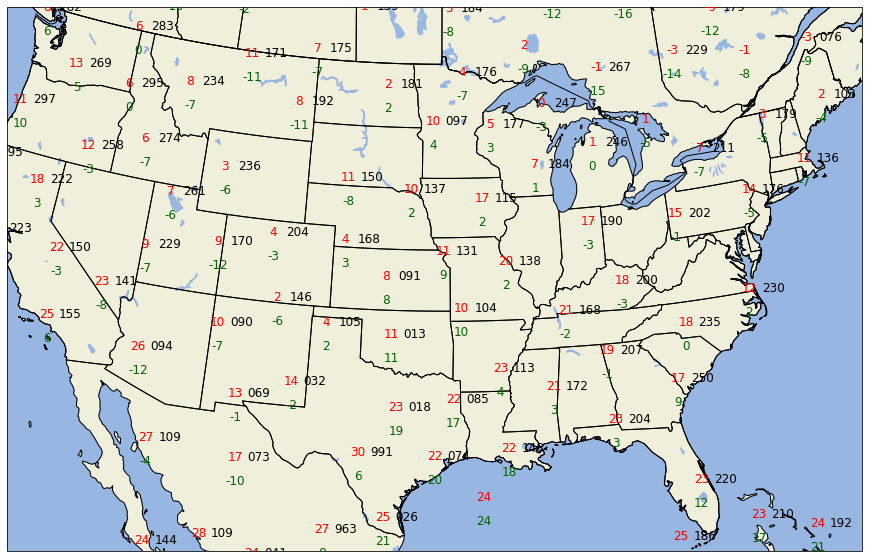

In [21]:
# ตั้งค่าความละเอียดของภาพ DPI
# ตรวจสอบความละเอียดได้จากข้อความ
plt.rcParams['savefig.dpi'] = 255

# สร้างภาพและกำหนดค่าเส้นโครงแผนที่
fig = plt.figure(figsize=(20, 10))
add_metpy_logo(fig, 1100, 300, size='large')
ax = fig.add_subplot(1, 1, 1, projection=proj)

# เพิ่มและตกแต่งแผนที่
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

# กำหนดขอบเขตแผนที่
ax.set_extent((-118, -73, 23, 50))


#------------------------------------------------------------------------------------------------------
# การกำหนดรายละเอียดของแผนที่ อยู่ด้านล่างบรรทัดนี้ทั้งหมด
# กำหนดข้อมูลที่ต้องการแสดงในแผนที่ ตำแหน่ง สี สัญลักษณ์

# กำหนดค่าตำแหน่งสถานีจากฟิวด์ lon/lat  กำหนดค่าเส้นโครงแผนที่ กำหนดขนาดของฟอนต์
stationplot = StationPlot(ax, df['longitude'].values, df['latitude'].values,
                          clip_on=True, transform=ccrs.PlateCarree(), fontsize=12)

#เพิ่มตัวเลขค่าอุณหภูมิอากาศและอุณหภูมิจุดน้ำค้าง กำหนดให้อยู่ในตำแหน่ง NW และ SW ตามลำดับ โดยกำหนดให้สีที่แตกต่างกัน
stationplot.plot_parameter('NW', df['air_temperature'].values, color='red')
stationplot.plot_parameter('SW', df['dew_point_temperature'].values,
                           color='darkgreen')

# เพิ่มตัวเลขที่ระบุถึงความกดอากาศระดับน้ำทะเล
# This uses the standard trailing 3-digits of the pressure value in tenths of millibars.
stationplot.plot_parameter('NE', df['air_pressure_at_sea_level'].values,
                           formatter=lambda v: format(10 * v, '.0f')[-3:])

plt.show()


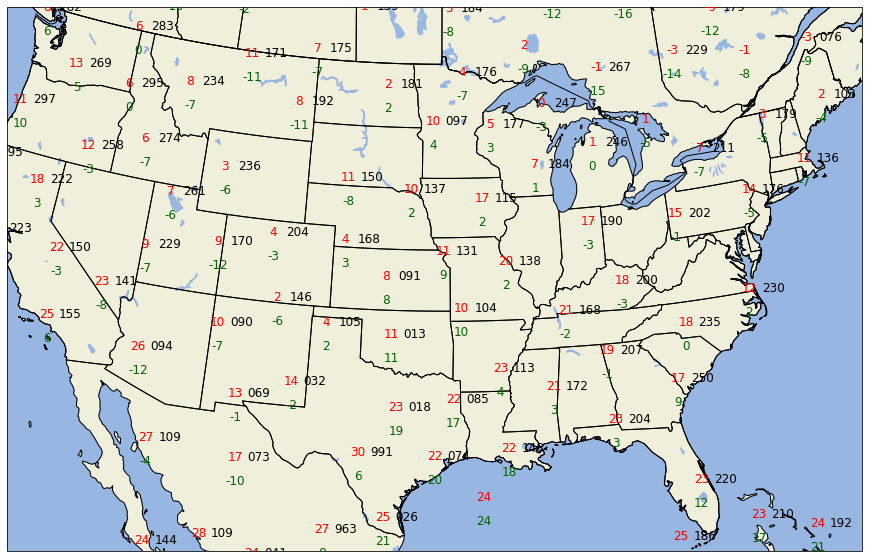

In [22]:
# เพิ่มตัวเลขที่ระบุถึงความกดอากาศระดับน้ำทะเล
# This uses the standard trailing 3-digits of the pressure value in tenths of millibars.
stationplot.plot_parameter('NE', df['air_pressure_at_sea_level'].values,
                           formatter=lambda v: format(10 * v, '.0f')[-3:])
fig

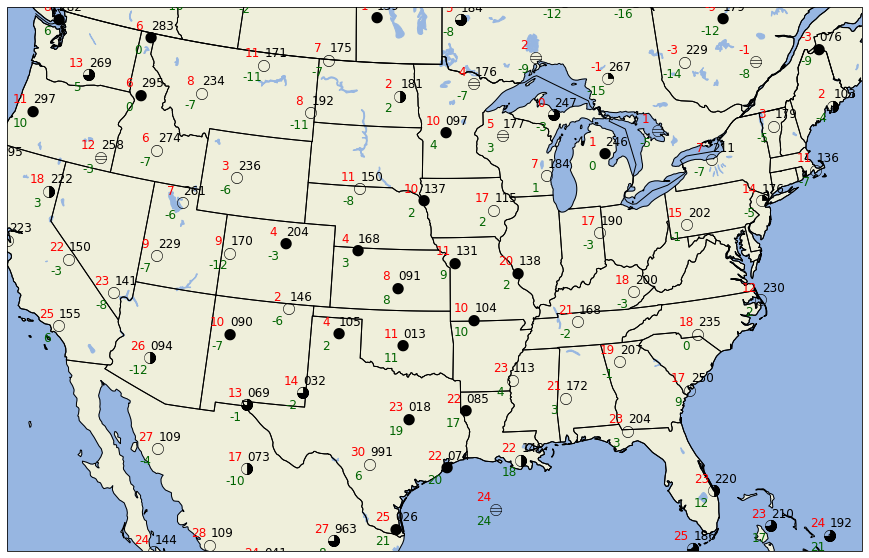

In [23]:
# เพิ่มสัญลักษณ์การปกคลุมของเมฆ ให้อยู่ในตำแหน่งตรงกลางของสัญลักษณ์ ด้วยการแปลงค่าในฟิวด์ ให้เป็นสัญลักษณ์
stationplot.plot_symbol('C', df['cloud_coverage'].values, sky_cover)

fig

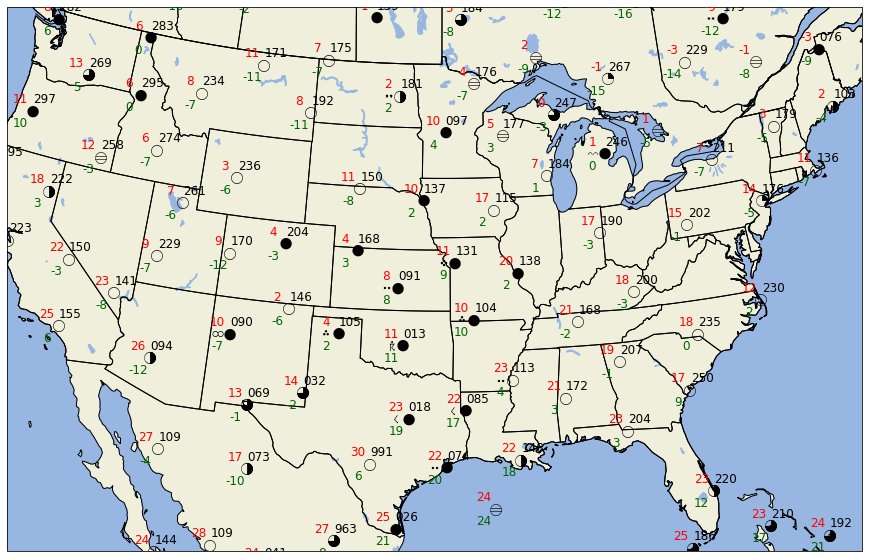

In [24]:
# เพิ่มสัญญลักษณ์สภาพอากาศปัจจุบันให้อยู่ตรงกลางทางด้านซ้ายของสัญลักษณ์ ด้วยการแปลงค่าในฟิวด์ให้เป็นสัญลักษณ์
stationplot.plot_symbol('W', df['current_wx1_symbol'].values, current_weather)

fig

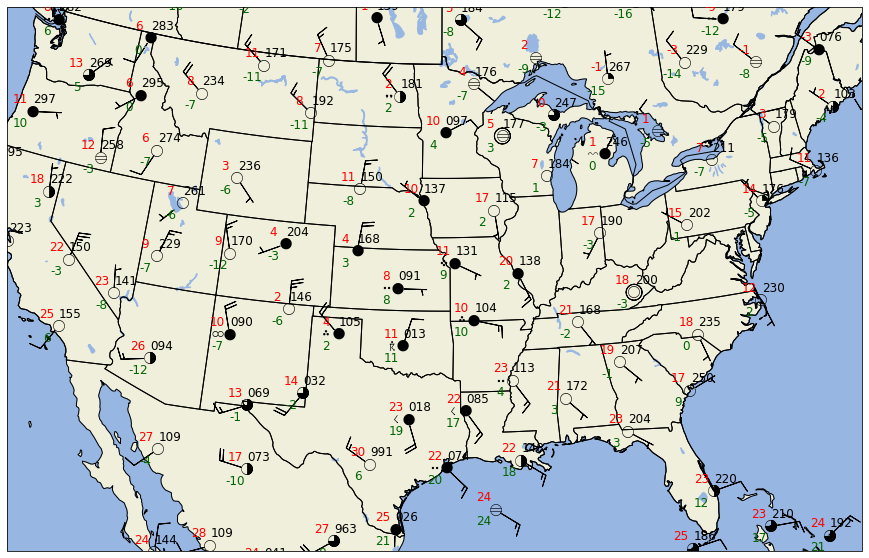

In [25]:
# เพิ่มสัญลักษณ์ของทิศลมหรือ  wind barbs
stationplot.plot_barb(df['eastward_wind'].values, df['northward_wind'].values)

fig

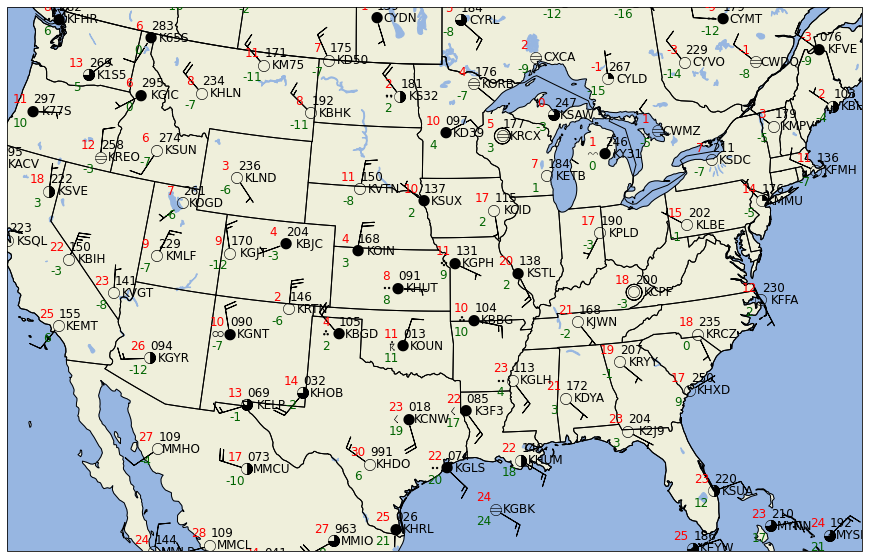

In [26]:
# เพิ่มชื่อสถานี 
stationplot.plot_text((2, 0), df['station_id'].values)

fig